# Data Acquisition Exercises

In [12]:
from pydataset import data
from env import get_db_url
from sklearn.model_selection import train_test_split


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import acquire as aq

#### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [ ]:
df_iris = data('iris')

In [ ]:
#4a. print the first 3 rows
df_iris.head(3)

In [ ]:
#4b. print the number of rows and columns (shape)
df_iris.shape

In [ ]:
#4c. print the column names
df_iris.columns.values

In [ ]:
#4d. print the data type of each column
df_iris.dtypes

In [ ]:
#4e. print the summary statistics for each of the numeric variables
df_iris.describe()

#### 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
filename = "Deangelo Bowen - jemison_spreadsheet_exercises - Table1_CustDetails.csv"
df_google_sheets = pd.read_csv(filename)

In [ ]:
#5a. 
df_google_sheets_sample = df_google_sheets.head(100)

In [ ]:
#5b. 
df_google_sheets.shape

# 7049 rows, 13 columns

In [ ]:
#5c 
df_google_sheets.columns.values[0:5]

In [ ]:
df_google_sheets.dtypes

In [ ]:
#5d
list(df_google_sheets.select_dtypes(['object']))

In [ ]:
#5e
math = df_google_sheets.select_dtypes(['float64'])
math.max() - math.min()

#### 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
filename = "Deangelo Bowen - jemison_spreadsheet_exercises.xlsx"
df_excel = pd.read_excel(filename)

#6a
df_excel_sample = df_excel.head(100)
df_excel_sample

In [ ]:
#6b
df_excel.shape

#7049 rows, 26 columns

In [ ]:
#6c
df_excel.columns.values[0:5]

In [ ]:
#6d
list(df_excel.select_dtypes(['object']))

In [ ]:
#6e 
math = df_excel.select_dtypes(['float64'])
math.max() - math.min()

#### 7. Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
# took the url from the data acquisition hyperlink file
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"


csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google= pd.read_csv(csv_export_url)

#7a
df_google.head(3)

In [ ]:
#7b
df_google.shape
#891 rows, #12 columns

In [ ]:
#7c
df_google.columns

In [ ]:
#7d
df_google.info()

In [ ]:
#7e
df_google.describe()

In [ ]:
#7f
df_google.nunique()

# Make a new python module, acquire.py to hold the following data aquisition functions:

#### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [ ]:
titanic_data = aq.get_titanic_data()
titanic_data.head()

#### Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
iris = aq.get_iris_data()
iris.head()

#### Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join all 4 tables together, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [ ]:
telco_churn = aq.get_telco_data()
telco_churn.head()

Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

- Done

# Data Preparation Exercises

#### Using the Iris Data:

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

#### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
iris = aq.get_iris_data()
iris.head()

#### 2. Drop the species_id and measurement_id columns.

In [ ]:
iris = iris.drop(['species_id', 'measurement_id'], axis = 1)
iris.head()

#### 3. Rename the species_name column to just species.

In [ ]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head()

#### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
dummy_var = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
dummy_var.head()

In [ ]:
iris = pd.concat([iris, dummy_var], axis = 1)
iris.head()

 #### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(iris):
    iris = iris.drop(['species_id','measurement_id'], axis = 1)
    iris = iris.rename(columns={'species_name': 'species'})
    dummy_var = pd.get_dummies(iris[['species']], dummy_na = False, drop_first=True)
    iris = pd.concat([iris, dummy_var], axis = 1)
    return iris

In [ ]:
# test function
simple_prep = prep_iris(iris)
simple_prep.head()

# Using the Titanic dataset

#### 1. Use the function defined in acquire.py to load the Titanic data.



In [ ]:
titanic = aq.get_titanic_data()
titanic.head()

#### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# Dropping columns
# dropping any possible duplicate 

titanic = titanic.drop(['pclass', 'passenger_id',
                            'class','deck', 'embarked'], axis= 1)
titanic.drop_duplicates(inplace=True)
titanic

#### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
titanic.info()

In [ ]:
# imputing
titanic['age'] = titanic.age.fillna(titanic.age.mean())
titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
titanic.info()

In [ ]:
# creating dummy variables
dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']],
                              dummy_na = False,
                              drop_first = [True, True])
dummy_titanic.head()

In [ ]:
# second drop
titanic = titanic.drop(['sex','embark_town'], axis= 1)

In [ ]:
titanic = pd.concat([titanic_alt, dummy_titanic], axis = 1)
titanic.head()

#### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(titanic):
    titanic = titanic.drop(['passenger_id',
                            'class','deck', 'embarked'], axis= 1)
    titanic.drop_duplicates(inplace=True)
    titanic['age'] = titanic.age.fillna(titanic.age.mean())
    titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
    dummy_titanic = pd.get_dummies(titanic[['sex', 'embark_town']],
                              dummy_na = False,
                              drop_first = [True, True])
    titanic = titanic.drop(['sex','embark_town'], axis= 1)
    titanic = pd.concat([titanic, dummy_titanic], axis = 1)
    return titanic

In [ ]:
titanic_prepped = prep_titanic(titanic)

In [ ]:
titanic_prepped.describe()

# Using the Telco dataset

#### 1. Use the function defined in acquire.py to load the Telco data.

In [ ]:
# get telco data
telco = aq.get_telco_data()
telco.head()

# Takeaways
- total charges is an object. Should be a float
- No need for type ids, to inclue customer id
- No need for device protection, tech support, online backup, online security, streaming tv, streaming movies
- no nulls

#### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
# drop duplicates
telco.drop_duplicates(inplace=True)

In [ ]:
telco = telco.drop(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                  'customer_id', 'online_security', 'online_backup', 'device_protection',
                  'tech_support', 'streaming_tv', 'streaming_movies'], axis= 1)
telco.head()

In [ ]:
telco['total_charges'] = telco['total_charges'].str.strip()
telco = telco[telco.total_charges != '']
telco['total_charges']= telco.total_charges.astype('float')

#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# mapping catgs. to numerics
# Yes = 1, No = 0
# idea : creating dummy columns just to drop them and keep numerics == mapping
telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
telco.head()

In [ ]:
# create dummy for cat cols
dummy_telco = pd.get_dummies(telco[['gender', 'multiple_lines', 'contract_type',
                                     'payment_type', 'internet_service_type']])

In [ ]:
# concat new cols, drop previous 
telco = pd.concat([telco, dummy_telco], axis = 1)
telco.head()

### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
# train, split, validate tests, from sklearn.model_selection 
train_validate, test = train_test_split(telco, test_size=.2,
                                       random_state=123,
                                       stratify=telco.churn)

train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate.churn)


In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
validate.shape

In [ ]:
# using the split data function from the lesson, and for practice:

def split_telco_data(telco):
    train_validate, test = train_test_split(telco, test_size=.2,
                                           random_state=123,
                                           stratify=telco.churn)
    train,validate = train_test_split(train_validate, test_size=.3,
                                     random_state=123,
                                     stratify=train_validate.churn)
    return train, validate, test

In [ ]:
# create the function prep_telco with the split function
def prep_telco(telco):
    
    # drop duplicates
    telco.drop_duplicates(inplace=True)
    
    # drop specific columns
    telco = telco.drop(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                  'customer_id', 'online_security', 'online_backup', 'device_protection',
                  'tech_support', 'streaming_tv', 'streaming_movies'], axis= 1)
    
    # strip spaces from total charges, turn into a float
    telco['total_charges'] = telco['total_charges'].str.strip()
    telco = telco[telco.total_charges != '']
    telco['total_charges']= telco.total_charges.astype('float')
    
    # map Yes = 1, No = 0
    telco['partner'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    # create dummy for cat cols to numeric cols
    dummy_telco = pd.get_dummies(telco[['gender', 'multiple_lines', 'contract_type',
                                     'payment_type', 'internet_service_type']])
    
    # concat
    telco = pd.concat([telco, dummy_telco], axis = 1)
    
    # train validate test
    train, validate, test = split_telco_data(telco)
    
    return train, validate, test

In [ ]:
# observe train validate test
train, validate, test = prep_telco(telco)

In [ ]:
train.info()
# no nulls, check

In [ ]:
validate.info()
# no nulls, check

In [ ]:
test.info()
# no nulls, check

# Takeaways
- Using train, test, validate helps split the data into categories for machine learning
- cleaning the data and then preparing them for entry into a machine learning model is best practice.

# Exploratory Analysis Exercises

## Part 1 - Iris Data

#### 1. Acquire, prepare & and split your data

In [31]:
import prepare as prep
import acquire as aq

In [32]:
# acquire data
iris = aq.get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [33]:
# prepare data. (already done, grab from prepare.py)
df = prep.prep_iris(iris)
df

(     sepal_length  sepal_width  petal_length  petal_width     species
 79            5.7          2.6           3.5          1.0  versicolor
 36            5.5          3.5           1.3          0.2      setosa
 133           6.3          2.8           5.1          1.5   virginica
 95            5.7          3.0           4.2          1.2  versicolor
 18            5.7          3.8           1.7          0.3      setosa
 139           6.9          3.1           5.4          2.1   virginica
 20            5.4          3.4           1.7          0.2      setosa
 31            5.4          3.4           1.5          0.4      setosa
 6             4.6          3.4           1.4          0.3      setosa
 115           6.4          3.2           5.3          2.3   virginica
 91            6.1          3.0           4.6          1.4  versicolor
 145           6.7          3.0           5.2          2.3   virginica
 125           7.2          3.2           6.0          1.8   virginica
 82   

In [34]:
# split data
train, validate, test = prep.prep_iris(iris)

In [35]:
# main dataset
train.shape

(84, 5)

In [36]:
validate.shape

(36, 5)

In [37]:
test.shape

(30, 5)

# 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [38]:
# operate only on train dataset
# removed unit8 species_versicolor/setosa cols. Check prep.py

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [39]:
#unit8's removed
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [40]:
# compute descriptive stats
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


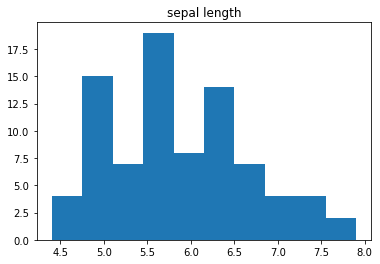

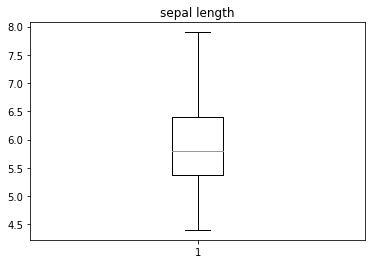

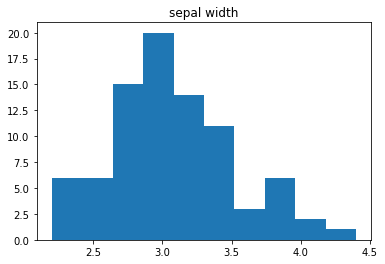

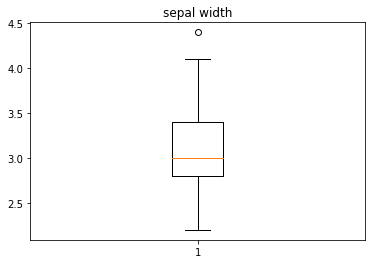

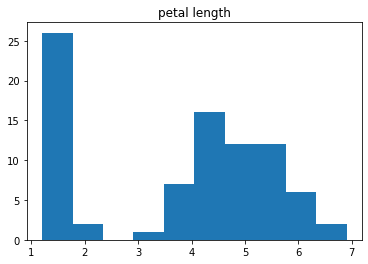

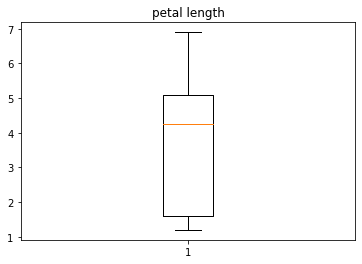

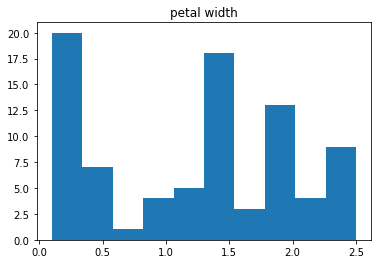

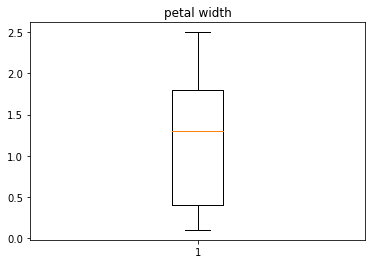

In [13]:
# plot numeric cols in histogram, boxplot
# Plotting the numeric columns 
# for loop is cleaner than doing each column individually, so I will take this route
# 
numcols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in numcols:
    #in order:
    #plot hist of # col
    plt.hist(train[col])
    # plt title of # col
    # replace underscore with space
    plt.title(col.replace('_', ' '))
    #show plt
    plt.show()
    # Now boxplot
    plt.boxplot(train[col])
    plt.title(col.replace('_', ' '))
    plt.show()
    
# inspired by https://stackoverflow.com/questions/54555052/plotting-multiple-figures-in-a-loop

- ## For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [29]:
freq_table = train.groupby('species').species.agg(['count']).reset_index()
# reset_index function resets the index of the dataframe else, when 
# inputting to a sns boxplot, the boxplot will not be able to read an unindexed
# category
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html


freq_table 

,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


<AxesSubplot:xlabel='species', ylabel='count'>

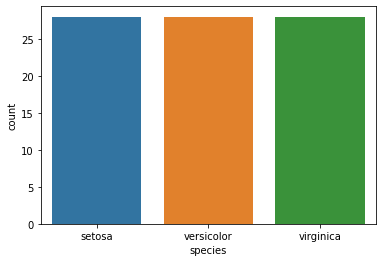

In [30]:
# bar plot via seaborn
sns.barplot(data = freq_table, x='species', y= 'count')

# Takeaways

- There is an even distribution between the species in count
- There are various spikes in petal width and length
- petal length standard deviation is vastly greater than it's counterparts which could have some significance in identifying type of flower. 

# 3. Bivariate Stats

- ### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


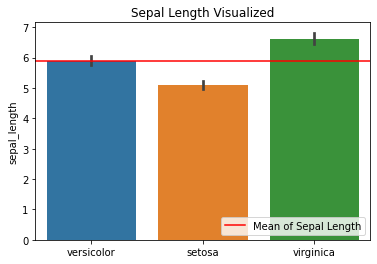

In [49]:
# Sepal Length Visualized
plt.title('Sepal Length Visualized')
sns.barplot(x='species', y='sepal_length', data = train)

# get mean
sepal_mean = train.sepal_length.mean()

#horizontal line on axis, axhline
plt.axhline(sepal_mean, label='Mean of Sepal Length', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

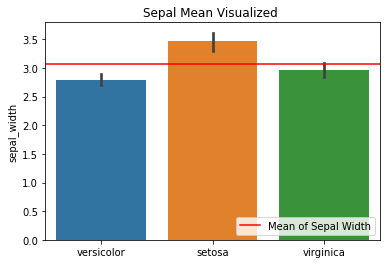

In [50]:
# Sepal Width Visualized
plt.title('Sepal Mean Visualized ')
sns.barplot(x='species', y='sepal_width', data = train)

# get mean
sepal_mean = train.sepal_width.mean()

#horizontal line on axis, axhline
plt.axhline(sepal_mean, label='Mean of Sepal Width', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

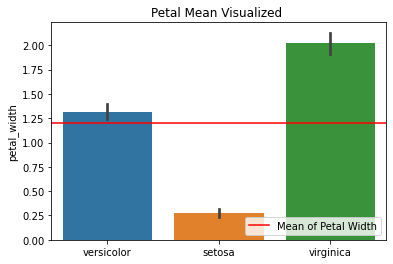

In [53]:
# Petal Width Visualized
plt.title('Petal Mean Visualized ')
sns.barplot(x='species', y='petal_width', data = train)

# get mean
petal_mean = train.petal_width.mean()

#horizontal line on axis, axhline
plt.axhline(petal_mean, label='Mean of Petal Width', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()

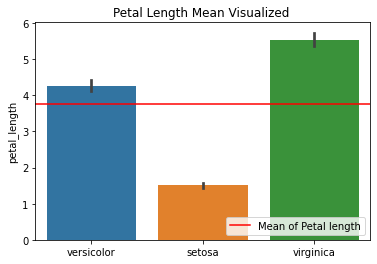

In [54]:
# Petal Length Visualized
plt.title('Petal Length Mean Visualized ')
sns.barplot(x='species', y='petal_length', data = train)

# get mean
petal_mean = train.petal_length.mean()

#horizontal line on axis, axhline
plt.axhline(petal_mean, label='Mean of Petal length', color = 'red')
plt.xlabel('')
plt.legend(loc = 'lower right')
plt.show()